In [175]:
import nltk
import string
import nltk
from nltk.corpus import stopwords



from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import unicodedata



def string_in_liste(string,liste):
    statue=False
    i=0
    while (statue==False and i<len(liste)):
        
        if  liste[i] in normalize_text(string):
            statue=True
        else:
            i+=1
    return statue
def lowercasing(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans("", "", string.punctuation)
    return text.translate(translator)

def remove_special(text):
    text=text.replace('\nu\nu',' ')
    text=text.replace('\nu',' ')
    text=text.replace('\n',' ')

    return text
def tokenize(text):
    return word_tokenize(text)

def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    return [word for word in tokens if word.lower() not in stop_words]
def clear_Distribution(text):
    return text.replace('Not For Distribution, Sale or Reproduction.'.lower(),'.')
def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in tokens]
def join_token(token):
    return ' '.join(token)
def remove_number(txt):
    text_without_numbers = re.sub(r'\d+', '', txt)
    return text_without_numbers
def preprocessing_pipeline(txt):
    lower=lowercasing(txt)
    lower=remove_special(clear_Distribution(lower))
    remove_punc=remove_punctuation(lower)
    token=tokenize(remove_number(remove_punc))
    remove_stop=remove_stopwords(token)
    #lemma=lemmatize(remove_stop)
    return join_token(remove_stop)



def parent_child_relationship(parent,relation,child):
    return {'head':parent,'type':relation[1:],'trail':child}

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Haboubi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Haboubi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Haboubi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [176]:
import RAKE
import operator
def clean_indexation(text) :
    pattern = r'^(\d+(\.\d+)+\s+)?'  

    
    cleaned_subtitles = re.sub(pattern, '', text)
    return cleaned_subtitles
def find_definion_in_string(input_name,input_string):
    # Define the regex pattern with the input name as a variable
    pattern = rf'{input_name}?\s+(?:is|means|refers to|defines|denotes|speciﬁes).*\.'

    # Search for the pattern in the input string
    match = re.search(pattern, input_string)

    if match:
        print('1')
        return match.group(0)
    else:
        return None
def Extract_refenrence(input_name,text):
    text=normalize_text(text)

    text=text.replace('\n',' ').replace('u u',' ').lower()
    
    regex=rf'{input_name}?(\s|\.)\s*described in section (\d\.)+'
    regex_other=rf'{input_name}?(\s|\.)\s*\(see section (\d\.)+'
    
    pattern=re.compile(regex)
    matchs=pattern.finditer(text)
    pattern=re.compile(regex_other)
   
    matchs_others=pattern.finditer(text)
    
    for match in matchs_others:
        if match.group()!=None:
            return match.group().replace(input_name+' ','')  
    for match in matchs:
        if match.group()!=None:
            return match.group().replace(input_name+' ','') 
    return None      
def synonym_creation(words_embedding,sentence,threshold=0.6):
    liste=[]
    inserted_word = clean_indexation(sentence.lower())
    tokenized=preprocessing_pipeline(inserted_word)
    try :
        similar_words = synonym.wv.most_similar(tokenized)
    
        for word, score in similar_words:
            if score >= threshold:
                liste.append(word)
        return liste
    except:
        pass
import re
def rake_keyword(text,top_key=20):
    stopword='s.txt'
    key=[]
    rake_object = RAKE.Rake(stopword)

    keywords = rake_object.run(clear_Distribution(text.replace('\n',' ').replace('\nu\nu',' ')))
    for i in keywords[0:top_key]:
        key.append(i[0])
    return key
def Extract_Figure(text):
    regex=r'Figure \d+-\d+'
    pattern=re.compile(regex)
    liste=[]
    matchs=pattern.finditer(text)
    for match in matchs:
        liste.append(match.group())
    return set(liste)
def Extract_Table(text):
    regex=r'Table \d+-\d+'
    pattern=re.compile(regex)
    liste=[]
    matchs=pattern.finditer(text)
    for match in matchs:
        liste.append(match.group())
    return set(liste)




def normalize_text(text):
    return unicodedata.normalize('NFKC', text)

def extract_definition(dictionary,text):
    doc = nlp(text)
    defintion=[]
    for sent in doc.sents:
        
        if any(normalize_text(token.lemma_) in dictionary for token in sent):
            defintion.append(sent)
            break
            
    return defintion
import spacy

nlp = spacy.load("en_core_web_sm")
dic_definition="define definition setting identify defining set establishing classifying specifying means meaning is"

doc = nlp(dic_definition)
liste=[]
for token in doc:
    liste.append(str(token.lemma_))
definition_dic=list(set(liste))

In [177]:
from gensim.models import Word2Vec
import pandas as pd
synonym = Word2Vec.load("synoynm_embedding.bin")


In [178]:
old_concept=pd.read_csv('old_concept_3.csv')

In [179]:
old_concept['name']=old_concept['Concept'].apply(lambda con:clean_indexation(con).lower())

In [180]:
old_concept

,Concept,Content,Parent_process,Parent_relationship,n_gram,ngram,key_words,rake_keyword,processed,synonym,clean_rebel_2,relationship_entites,relationship_entites_clean,relationship_entites_final,parent_child_relationship,ListColumn,relationship_entites_final_1,name
0,11.1.1.1 PROJECT CHARTER,11.1.1.1 PROJECT CHARTER\nDescribed in Section...,PLAN RISK MANAGEMENT,INPUTS,"['11.1.1.1', 'PROJECT', 'CHARTER', '\n', 'Desc...","['project', 'charter', 'described', 'section',...","['or reproduction 403', 'requirements and risk...","['high-level project description', 'high- leve...",project charter described section project char...,"['guide •', 'charter plan', '• project', 'ente...",described in section 4.1.3.1. the project cha...,"[{'head': 'project description', 'type': 'part...","[{'head': 'requirements', 'type': 'part of', '...","[{'head': 'project description', 'type': 'part...","{'head': 'plan risk management', 'type': ' inp...","[{'head': 'requirements', 'type': 'part of', '...","[{'head': 'project description', 'type': 'part...",project charter
1,11.1.1.2 PROJECT MANAGEMENT PLAN,11.1.1.2 PROJECT MANAGEMENT PLAN\nDescribed in...,PLAN RISK MANAGEMENT,INPUTS,"['11.1.1.2', 'PROJECT', 'MANAGEMENT', 'PLAN', ...","['project', 'management', 'plan', 'described',...","['plan components might', 'other project manag...","['approved subsidiary management plans', 'risk...",project management plan described section plan...,"['• organizational process', 'data flow diagra...",described in section 4.2.3.1. in planning pro...,"[{'head': 'project management plan', 'type': '...","[{'head': 'Project Risk Management', 'type': '...","[{'head': 'project management plan', 'type': '...","{'head': 'plan risk management', 'type': ' inp...","[{'head': 'Project Risk Management', 'type': '...","[{'head': 'project management plan', 'type': '...",project management plan
2,11.1.1.3 PROJECT DOCUMENTS,11.1.1.3 PROJECT DOCUMENTS\nProject documents ...,PLAN RISK MANAGEMENT,INPUTS,"['11.1.1.3', 'PROJECT', 'DOCUMENTS', '\n', 'Pr...","['project', 'documents', 'project', 'documents...","['project as well', 'is useful in', 'this is u...","['3 project documents project documents', 'set...",project documents project documents considered...,"['documents project', 'assumption log']",project documents that can be considered as i...,"[{'head': 'risk thresholds', 'type': 'facet of...","[{'head': 'risk thresholds', 'type': 'facet of...","[{'type': 'facet of', 'head': 'risk thresholds...","{'head': 'plan risk management', 'type': ' inp...","[{'head': 'risk thresholds', 'type': 'facet of...","[{'type': 'facet of', 'head': 'risk thresholds...",project documents
3,11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS,11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS\nThe...,PLAN RISK MANAGEMENT,INPUTS,"['11.1.1.4', 'ENTERPRISE', 'ENVIRONMENTAL', 'F...","['enterprise', 'environmental', 'factors', 'en...","['enterprise environmental factors', 'or key s...","['plan risk management process include', 'risk...",enterprise environmental factors enterprise en...,"['factors enterprise environmental', 'environm...",the enterprise environmental factors that can...,"[{'head': 'risk management', 'type': 'studies'...","[{'head': 'Risk Management', 'type': 'studies'...","[{'type': 'studied by', 'tail': 'risk manageme...","{'head': 'plan risk management', 'type': ' inp...","[{'head': 'risk threshold', 'type': 'studied b...","[{'type': 'studied by', 'tail': 'risk manageme...",enterprise environmental factors
4,11.1.1.5 ORGANIZATIONAL PROCESS ASSETS,11.1.1.5 ORGANIZATIONAL PROCESS ASSETS\nThe or...,PLAN RISK MANAGEMENT,INPUTS,"['11.1.1.5', 'ORGANIZATIONAL', 'PROCESS', 'ASS...","['organizational', 'process', 'assets', 'organ...","['organizational process assets', '404 part gu...","['plan risk management process include', 'risk...",organizational process assets organizational p...,"['process assets organizational', 'process ass...",the organizational process assets that can in...,"[{'head': 'risk register', 'type': 'part of

In [181]:
old_concept.columns

Index(['Concept', 'Content', 'Parent_process', 'Parent_relationship', 'n_gram',
       'ngram', 'key_words', 'rake_keyword', 'processed', 'synonym',
       'clean_rebel_2', 'relationship_entites', 'relationship_entites_clean',
       'relationship_entites_final', 'parent_child_relationship', 'ListColumn',
       'relationship_entites_final_1', 'name'],
      dtype='object')

In [182]:
concept_df=old_concept.drop(['n_gram','ngram','key_words','processed','clean_rebel_2','relationship_entites', 'relationship_entites_clean',
       'relationship_entites_final','ListColumn','Parent_process','Parent_relationship'],axis=1)

In [183]:
concept_df

,Concept,Content,rake_keyword,synonym,parent_child_relationship,relationship_entites_final_1,name
0,11.1.1.1 PROJECT CHARTER,11.1.1.1 PROJECT CHARTER\nDescribed in Section...,"['high-level project description', 'high- leve...","['guide •', 'charter plan', '• project', 'ente...","{'head': 'plan risk management', 'type': ' inp...","[{'head': 'project description', 'type': 'part...",project charter
1,11.1.1.2 PROJECT MANAGEMENT PLAN,11.1.1.2 PROJECT MANAGEMENT PLAN\nDescribed in...,"['approved subsidiary management plans', 'risk...","['• organizational process', 'data flow diagra...","{'head': 'plan risk management', 'type': ' inp...","[{'head': 'project management plan', 'type': '...",project management plan
2,11.1.1.3 PROJECT DOCUMENTS,11.1.1.3 PROJECT DOCUMENTS\nProject documents ...,"['3 project documents project documents', 'set...","['documents project', 'assumption log']","{'head': 'plan risk management', 'type': ' inp...","[{'type': 'facet of', 'head': 'risk thresholds...",project documents
3,11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS,11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS\nThe...,"['plan risk management process include', 'risk...","['factors enterprise environmental', 'environm...","{'head': 'plan risk management', 'type': ' inp...","[{'type': 'studied by', 'tail': 'risk manageme...",enterprise environmental factors
4,11.1.1.5 ORGANIZATIONAL PROCESS ASSETS,11.1.1.5 ORGANIZATIONAL PROCESS ASSETS\nThe or...,"['plan risk management process include', 'risk...","['process assets organizational', 'process ass...","{'head': 'plan risk management', 'type': ' inp...","[{'tail': 'risk management plan', 'type': 'par...",organizational process assets
...,...,...,...,...,...,...,...
77,11.7.3.1 WORK PERFORMANCE INFORMATION,11.7.3.1 WORK PERFORMANCE INFORMATION\nDescrib...,['work performance information includes inform...,"['described section work', 'section work perfo...","{'head': 'monitor risks', 'type': ' outputs', ...","[{'type': 'facet of', 'tail': 'project risk ma...",work performance information
78,11.7.3.2 CHANGE REQUESTS,11.7.3.2 CHANGE REQUESTS\nDescribed in Section...,"['perform integrated change control process', ...","['schedule baselines', 'baselines components',...","{'head': 'monitor risks', 'type': ' outputs', ...","[{'head': 'cost and schedule', 'tail': 'projec...",change requests
79,11.7.3.3 PROJECT MANAGEMENT PLAN UPDATES,11.7.3.3 PROJECT MANAGEMENT PLAN UPDATES\nAny ...,"['3 project management plan updates', 'project...","['perform integrated change control', 'change ...","{'head': 'monitor risks', 'type': ' outputs', ...","[{'type': 'facet of', 'head': 'change control'...",project management plan updates
80,11.7.3.4 PROJECT DOCUMENTS UPDATES,11.7.3.4 PROJECT DOCUMENTS UPDATES\nProject do...,"['individual project risks generated', 'major...","['documents updates •', 'updates • assumption'...","{'head': 'monitor risks', 'type': ' outputs', ...","[{'type': 'part of', 'head': 'project risk', '...",project documents updates


In [184]:
concept_df['description']=concept_df.apply(lambda row:Extract_refenrence(row['name'],row['Content'].lower()),axis=1)

In [185]:
i=78
Extract_refenrence(concept_df['name'][i],concept_df['Content'][i])

'described in section 4.3.3.4.'

In [186]:
old_concept

,Concept,Content,Parent_process,Parent_relationship,n_gram,ngram,key_words,rake_keyword,processed,synonym,clean_rebel_2,relationship_entites,relationship_entites_clean,relationship_entites_final,parent_child_relationship,ListColumn,relationship_entites_final_1,name
0,11.1.1.1 PROJECT CHARTER,11.1.1.1 PROJECT CHARTER\nDescribed in Section...,PLAN RISK MANAGEMENT,INPUTS,"['11.1.1.1', 'PROJECT', 'CHARTER', '\n', 'Desc...","['project', 'charter', 'described', 'section',...","['or reproduction 403', 'requirements and risk...","['high-level project description', 'high- leve...",project charter described section project char...,"['guide •', 'charter plan', '• project', 'ente...",described in section 4.1.3.1. the project cha...,"[{'head': 'project description', 'type': 'part...","[{'head': 'requirements', 'type': 'part of', '...","[{'head': 'project description', 'type': 'part...","{'head': 'plan risk management', 'type': ' inp...","[{'head': 'requirements', 'type': 'part of', '...","[{'head': 'project description', 'type': 'part...",project charter
1,11.1.1.2 PROJECT MANAGEMENT PLAN,11.1.1.2 PROJECT MANAGEMENT PLAN\nDescribed in...,PLAN RISK MANAGEMENT,INPUTS,"['11.1.1.2', 'PROJECT', 'MANAGEMENT', 'PLAN', ...","['project', 'management', 'plan', 'described',...","['plan components might', 'other project manag...","['approved subsidiary management plans', 'risk...",project management plan described section plan...,"['• organizational process', 'data flow diagra...",described in section 4.2.3.1. in planning pro...,"[{'head': 'project management plan', 'type': '...","[{'head': 'Project Risk Management', 'type': '...","[{'head': 'project management plan', 'type': '...","{'head': 'plan risk management', 'type': ' inp...","[{'head': 'Project Risk Management', 'type': '...","[{'head': 'project management plan', 'type': '...",project management plan
2,11.1.1.3 PROJECT DOCUMENTS,11.1.1.3 PROJECT DOCUMENTS\nProject documents ...,PLAN RISK MANAGEMENT,INPUTS,"['11.1.1.3', 'PROJECT', 'DOCUMENTS', '\n', 'Pr...","['project', 'documents', 'project', 'documents...","['project as well', 'is useful in', 'this is u...","['3 project documents project documents', 'set...",project documents project documents considered...,"['documents project', 'assumption log']",project documents that can be considered as i...,"[{'head': 'risk thresholds', 'type': 'facet of...","[{'head': 'risk thresholds', 'type': 'facet of...","[{'type': 'facet of', 'head': 'risk thresholds...","{'head': 'plan risk management', 'type': ' inp...","[{'head': 'risk thresholds', 'type': 'facet of...","[{'type': 'facet of', 'head': 'risk thresholds...",project documents
3,11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS,11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS\nThe...,PLAN RISK MANAGEMENT,INPUTS,"['11.1.1.4', 'ENTERPRISE', 'ENVIRONMENTAL', 'F...","['enterprise', 'environmental', 'factors', 'en...","['enterprise environmental factors', 'or key s...","['plan risk management process include', 'risk...",enterprise environmental factors enterprise en...,"['factors enterprise environmental', 'environm...",the enterprise environmental factors that can...,"[{'head': 'risk management', 'type': 'studies'...","[{'head': 'Risk Management', 'type': 'studies'...","[{'type': 'studied by', 'tail': 'risk manageme...","{'head': 'plan risk management', 'type': ' inp...","[{'head': 'risk threshold', 'type': 'studied b...","[{'type': 'studied by', 'tail': 'risk manageme...",enterprise environmental factors
4,11.1.1.5 ORGANIZATIONAL PROCESS ASSETS,11.1.1.5 ORGANIZATIONAL PROCESS ASSETS\nThe or...,PLAN RISK MANAGEMENT,INPUTS,"['11.1.1.5', 'ORGANIZATIONAL', 'PROCESS', 'ASS...","['organizational', 'process', 'assets', 'organ...","['organizational process assets', '404 part gu...","['plan risk management process include', 'risk...",organizational process assets organizational p...,"['process assets organizational', 'process ass...",the organizational process assets that can in...,"[{'head': 'risk register', 'type': 'part of

In [187]:
big_concept=pd.read_csv('big_process.csv')

In [188]:
big_concept

,Process,Content,Intro,Examples,Definitions,Actionable_items,Extract_refenrence,UserCase,Figure,Table
0,11.1 PLAN RISK MANAGEMENT,11.1 PLAN RISK MANAGEMENT\nPlan Risk Managemen...,11.1 PLAN RISK MANAGEMENT\nPlan Risk Managemen...,[],[11.1 PLAN RISK MANAGEMENT\nPlan Risk Manageme...,['Figure 11-3 depicts the data ﬂow diagram for...,[],[],"{'Figure 11-2', 'Figure 11-3'}",set()
1,11.2 IDENTIFY RISKS,11.2 IDENTIFY RISKS\nIdentify Risks is the pro...,11.2 IDENTIFY RISKS\nIdentify Risks is the pro...,[],[11.2 IDENTIFY RISKS\nIdentify Risks is the pr...,['Figure 11-7 depicts the data ﬂow diagram for...,[],[' The frequency of iteration and participatio...,"{'Figure 11-6', 'Figure 11-7'}",set()
2,11.3 PERFORM QUALITATIVE RISK ANALYSIS,11.3 PERFORM QUALITATIVE RISK ANALYSIS\nPerfor...,11.3 PERFORM QUALITATIVE RISK ANALYSIS\nPerfor...,[],[11.3 PERFORM QUALITATIVE RISK ANALYSIS\nPerfo...,['Figure 11-9 depicts the data ﬂow \ndiagram f...,[],[],"{'Figure 11-9', 'Figure 11-8'}",set()
3,11.4 PERFORM QUANTITATIVE RISK ANALYSIS,11.4 PERFORM QUANTITATIVE RISK ANALYSIS\nPerfo...,11.4 PERFORM QUANTITATIVE RISK ANALYSIS\nPerfo...,[],[11.4 PERFORM QUANTITATIVE RISK ANALYSIS\nPerf...,"['Perform Quantitative Risk Analysis: Inputs, ...",[],[],"{'Figure 11-12', 'Figure 11-11'}",set()
4,11.5 PLAN RISK RESPONSES,11.5 PLAN RISK RESPONSES\nPlan Risk Responses ...,11.5 PLAN RISK RESPONSES\nPlan Risk Responses ...,"[' If developed, it may include identiﬁcation ...",[11.5 PLAN RISK RESPONSES\nPlan Risk Responses...,"['Plan Risk Responses: Inputs, Tools & Techniq...",[],[],"{'Figure 11-16', 'Figure 11-17'}",set()
5,11.6 IMPLEMENT RISK RESPONSES,11.6 IMPLEMENT RISK RESPONSES\nImplement Risk ...,11.6 IMPLEMENT RISK RESPONSES\nImplement Risk ...,[],[Implement Risk Responses is the process of im...,['Figure 11-19 depicts the data ﬂow diagram fo...,[],[],"{'Figure 11-18', 'Figure 11-19'}",set()
6,11.7 MONITOR RISKS,11.7 MONITOR RISKS\nMonitor Risks is the proce...,11.7 MONITOR RISKS\nMonitor Risks is the proce...,[],[11.7 MONITOR RISKS\nMonitor Risks is the proc...,[],[],[],"{'Figure 11-21', 'Figure 11-20'}",set()


In [189]:
big_concept.columns

Index(['Process', 'Content', 'Intro', 'Examples', 'Definitions',
       'Actionable_items', 'Extract_refenrence', 'UserCase', 'Figure',
       'Table'],
      dtype='object')

In [190]:
big_concept_use=big_concept.drop(['Content','Examples','Actionable_items','Extract_refenrence',
       'UserCase'],axis=1)

In [191]:
big_concept_use

,Process,Intro,Definitions,Figure,Table
0,11.1 PLAN RISK MANAGEMENT,11.1 PLAN RISK MANAGEMENT\nPlan Risk Managemen...,[11.1 PLAN RISK MANAGEMENT\nPlan Risk Manageme...,"{'Figure 11-2', 'Figure 11-3'}",set()
1,11.2 IDENTIFY RISKS,11.2 IDENTIFY RISKS\nIdentify Risks is the pro...,[11.2 IDENTIFY RISKS\nIdentify Risks is the pr...,"{'Figure 11-6', 'Figure 11-7'}",set()
2,11.3 PERFORM QUALITATIVE RISK ANALYSIS,11.3 PERFORM QUALITATIVE RISK ANALYSIS\nPerfor...,[11.3 PERFORM QUALITATIVE RISK ANALYSIS\nPerfo...,"{'Figure 11-9', 'Figure 11-8'}",set()
3,11.4 PERFORM QUANTITATIVE RISK ANALYSIS,11.4 PERFORM QUANTITATIVE RISK ANALYSIS\nPerfo...,[11.4 PERFORM QUANTITATIVE RISK ANALYSIS\nPerf...,"{'Figure 11-12', 'Figure 11-11'}",set()
4,11.5 PLAN RISK RESPONSES,11.5 PLAN RISK RESPONSES\nPlan Risk Responses ...,[11.5 PLAN RISK RESPONSES\nPlan Risk Responses...,"{'Figure 11-16', 'Figure 11-17'}",set()
5,11.6 IMPLEMENT RISK RESPONSES,11.6 IMPLEMENT RISK RESPONSES\nImplement Risk ...,[Implement Risk Responses is the process of im...,"{'Figure 11-18', 'Figure 11-19'}",set()
6,11.7 MONITOR RISKS,11.7 MONITOR RISKS\nMonitor Risks is the proce...,[11.7 MONITOR RISKS\nMonitor Risks is the proc...,"{'Figure 11-21', 'Figure 11-20'}",set()


In [192]:
big_concept_use.rename(columns={'Process':'Concept'},inplace=True)

In [193]:
big_concept_use['name']=big_concept_use['Concept'].apply(lambda con:clean_indexation(con).lower())

In [194]:
big_concept_use['rake_keyword']=big_concept_use['Intro'].apply(lambda con:rake_keyword(con))

In [195]:
big_concept_use['synonym']=big_concept_use['Concept'].apply(lambda txt : synonym_creation(synonym,txt))

In [196]:
big_concept_use.rename(columns={'Definitions':'description'},inplace=True)

In [197]:
big_concept_use['importance']=0.8

In [198]:
concept_df['importance']=0.6

In [199]:
display(concept_df)

,Concept,Content,rake_keyword,synonym,parent_child_relationship,relationship_entites_final_1,name,description,importance
0,11.1.1.1 PROJECT CHARTER,11.1.1.1 PROJECT CHARTER\nDescribed in Section...,"['high-level project description', 'high- leve...","['guide •', 'charter plan', '• project', 'ente...","{'head': 'plan risk management', 'type': ' inp...","[{'head': 'project description', 'type': 'part...",project charter,described in section 4.1.3.1.,0.6
1,11.1.1.2 PROJECT MANAGEMENT PLAN,11.1.1.2 PROJECT MANAGEMENT PLAN\nDescribed in...,"['approved subsidiary management plans', 'risk...","['• organizational process', 'data flow diagra...","{'head': 'plan risk management', 'type': ' inp...","[{'head': 'project management plan', 'type': '...",project management plan,described in section 4.2.3.1.,0.6
2,11.1.1.3 PROJECT DOCUMENTS,11.1.1.3 PROJECT DOCUMENTS\nProject documents ...,"['3 project documents project documents', 'set...","['documents project', 'assumption log']","{'head': 'plan risk management', 'type': ' inp...","[{'type': 'facet of', 'head': 'risk thresholds...",project documents,None,0.6
3,11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS,11.1.1.4 ENTERPRISE ENVIRONMENTAL FACTORS\nThe...,"['plan risk management process include', 'risk...","['factors enterprise environmental', 'environm...","{'head': 'plan risk management', 'type': ' inp...","[{'type': 'studied by', 'tail': 'risk manageme...",enterprise environmental factors,None,0.6
4,11.1.1.5 ORGANIZATIONAL PROCESS ASSETS,11.1.1.5 ORGANIZATIONAL PROCESS ASSETS\nThe or...,"['plan risk management process include', 'risk...","['process assets organizational', 'process ass...","{'head': 'plan risk management', 'type': ' inp...","[{'tail': 'risk management plan', 'type': 'par...",organizational process assets,None,0.6
...,...,...,...,...,...,...,...,...,...
77,11.7.3.1 WORK PERFORMANCE INFORMATION,11.7.3.1 WORK PERFORMANCE INFORMATION\nDescrib...,['work performance information includes inform...,"['described section work', 'section work perfo...","{'head': 'monitor risks', 'type': ' outputs', ...","[{'type': 'facet of', 'tail': 'project risk ma...",work performance information,described in section 4.5.1.3.,0.6
78,11.7.3.2 CHANGE REQUESTS,11.7.3.2 CHANGE REQUESTS\nDescribed in Section...,"['perform integrated change control process', ...","['schedule baselines', 'baselines components',...","{'head': 'monitor risks', 'type': ' outputs', ...","[{'head': 'cost and schedule', 'tail': 'projec...",change requests,described in section 4.3.3.4.,0.6
79,11.7.3.3 PROJECT MANAGEMENT PLAN UPDATES,11.7.3.3 PROJECT MANAGEMENT PLAN UPDATES\nAny ...,"['3 project management plan updates', 'project...","['perform integrated change control', 'change ...","{'head': 'monitor risks', 'type': ' outputs', ...","[{'type': 'facet of', 'head': 'change control'...",project management plan updates,None,0.6
80,11.7.3.4 PROJECT DOCUMENTS UPDATES,11.7.3.4 PROJECT DOCUMENTS UPDATES\nProject do...,"['individual project risks generated', 'major...","['documents updates •', 'updates • assumption'...","{'head': 'monitor risks', 'type': ' outputs', ...","[{'type': 'part of', 'head': 'project risk', '...",project documents updates,None,0.6


In [200]:
concept_df['relationship_entites_final_1'][0]

"[{'head': 'project description', 'type': 'part of', 'tail': 'project charter'}, {'head': 'project charter', 'type': 'has_part', 'tail': 'project description'}]"

In [201]:
display(pd.read_csv('new_concept_3.csv'))

,Concept,Content,definition,reference
0,root cause analysis,11.2.2.3 data analysis data analysis technique...,NaN,['root cause analysis. root cause analysis (se...
1,Data representation techniques,11.1.2.2 data analysis data analysis technique...,NaN,[]
2,Qualitative Risk Analysis,11.4.2.5 data analysis data analysis technique...,NaN,[]
3,Cost forecasts,11.4.1.2 project documents project documents t...,NaN,[]
4,Risk categories,11.3.2.5 risk categorization risks to the proj...,NaN,[]
...,...,...,...,...
214,quantitative risk analysis,11.4.2.2 data gathering interviews (see sectio...,NaN,[]
215,project process control,11.7.3.3 project management plan updates any c...,NaN,[]
216,fallback plan,11.5.3.1 change requests described in section ...,NaN,[]
217,risk responses,11.6.2.2 interpersonal and team skills interpe...,NaN,[]


In [202]:
def create_relationhsip_entites_liste(liste_of_sources):
    liste_relationhship=[]
    for sources in liste_of_sources:
        for source in sources: 
            if isinstance(source,dict):
                liste_relationhship.append(source)
            else:
                for s in source : #  a liste of dictionary
                    liste_relationhship.append(s)
    return liste_relationhship

In [203]:
import ast

concept_df['relationship_entites_final_1'] = concept_df['relationship_entites_final_1'].apply(lambda x: ast.literal_eval(x) if x else [])
concept_df['rake_keyword'] = concept_df['rake_keyword'].apply(lambda x: ast.literal_eval(x) if x else [])
concept_df['synonym'] = concept_df['synonym'].fillna('')
concept_df['synonym'] = concept_df['synonym'].apply(lambda x: ast.literal_eval(x) if x  else [])
concept_df['parent_child_relationship'] = concept_df['parent_child_relationship'].apply(lambda x: ast.literal_eval(x) if x else [])

In [205]:
def fix_parent_relationship(dic):
    dic['tail']=dic['trail']
    return dic

#concept_df['parent_child_relationship']=concept_df['parent_child_relationship'].apply(lambda txt:fix_parent_relationship(txt))


In [206]:
liste_of_relat=create_relationhsip_entites_liste([concept_df['parent_child_relationship'],concept_df['relationship_entites_final_1']])

In [207]:
liste_of_relat

[{'head': 'plan risk management',
  'type': ' inputs',
  'trail': 'project charter',
  'tail': 'project charter'},
 {'head': 'plan risk management',
  'type': ' inputs',
  'trail': 'project management plan',
  'tail': 'project management plan'},
 {'head': 'plan risk management',
  'type': ' inputs',
  'trail': 'project documents',
  'tail': 'project documents'},
 {'head': 'plan risk management',
  'type': ' inputs',
  'trail': 'enterprise environmental factors',
  'tail': 'enterprise environmental factors'},
 {'head': 'plan risk management',
  'type': ' inputs',
  'trail': 'organizational process assets',
  'tail': 'organizational process assets'},
 {'head': 'plan risk management',
  'type': ' tools and techniques',
  'trail': 'expert judgment',
  'tail': 'expert judgment'},
 {'head': 'plan risk management',
  'type': ' tools and techniques',
  'trail': 'data analysis',
  'tail': 'data analysis'},
 {'head': 'plan risk management',
  'type': ' tools and techniques',
  'trail': 'meetings

In [208]:
big_concept_use['description']=big_concept_use['Intro'].apply(lambda con:str(extract_definition(dic_definition,con)[0]).lower().replace('\n',' '))
big_concept_use['description']=big_concept_use['description'].apply(lambda con:clean_indexation(con))

In [209]:
big_concept_use['description'][0]

'plan risk management plan risk management is the process of deﬁning how to conduct risk management activities for a project.'

In [210]:
frames = [big_concept_use, concept_df]
 
result = pd.concat(frames)
result.reset_index(drop=True,inplace=True)
display(result)

,Concept,Intro,description,Figure,Table,name,rake_keyword,synonym,importance,Content,parent_child_relationship,relationship_entites_final_1
0,11.1 PLAN RISK MANAGEMENT,11.1 PLAN RISK MANAGEMENT\nPlan Risk Managemen...,plan risk management plan risk management is t...,"{'Figure 11-2', 'Figure 11-3'}",set(),plan risk management,"[conduct risk management activities, risk mana...","[risk management process, inﬂuence plan risk, ...",0.8,NaN,NaN,NaN
1,11.2 IDENTIFY RISKS,11.2 IDENTIFY RISKS\nIdentify Risks is the pro...,identify risks identify risks is the process o...,"{'Figure 11-6', 'Figure 11-7'}",set(),identify risks,"[perform qualitative risk analysis process, id...","[risk also, risks process, matter experts, sub...",0.8,NaN,NaN,NaN
2,11.3 PERFORM QUALITATIVE RISK ANALYSIS,11.3 PERFORM QUALITATIVE RISK ANALYSIS\nPerfor...,perform qualitative risk analysis perform qual...,"{'Figure 11-9', 'Figure 11-8'}",set(),perform qualitative risk analysis,"[perform qualitative risk analysis process, p...","[qualitative risk analysis process, identiﬁed ...",0.8,NaN,NaN,NaN
3,11.4 PERFORM QUANTITATIVE RISK ANALYSIS,11.4 PERFORM QUANTITATIVE RISK ANALYSIS\nPerfo...,perform quantitative risk analysis perform qua...,"{'Figure 11-12', 'Figure 11-11'}",set(),perform quantitative risk analysis,[provide additional quantitative risk informat...,"[project documents project management, documen...",0.8,NaN,NaN,NaN
4,11.5 PLAN RISK RESPONSES,11.5 PLAN RISK RESPONSES\nPlan Risk Responses ...,plan risk responses plan risk responses is the...,"{'Figure 11-16', 'Figure 11-17'}",set(),plan risk responses,"[structured decision-making techniques, treat ...","[risk responses process, assets project manage...",0.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
84,11.7.3.1 WORK PERFORMANCE INFORMATION,NaN,described in section 4.5.1.3.,NaN,NaN,work performance information,[work performance information includes informa...,"[described section work, section work performa...",0.6,11.7.3.1 WORK PERFORMANCE INFORMATION\nDescrib...,"{'head': 'monitor risks', 'type': ' outputs', ...","[{'type': 'facet of', 'tail': 'project risk ma..."
85,11.7.3.2 CHANGE REQUESTS,NaN,described in section 4.3.3.4.,NaN,NaN,change requests,"[perform integrated change control process, ad...","[schedule baselines, baselines components, pla...",0.6,11.7.3.2 CHANGE REQUESTS\nDescribed in Section...,"{'head': 'monitor risks', 'type': ' outputs', ...","[{'head': 'cost and schedule', 'tail': 'projec..."
86,11.7.3.3 PROJECT MANAGEMENT PLAN UPDATES,NaN,None,NaN,NaN,project management plan updates,"[3 project management plan updates, project ma...","[perform integrated change control, change con...",0.6,11.7.3.3 PROJECT MANAGEMENT PLAN UPDATES\nAny ...,"{'head': 'monitor risks', 'type': ' outputs', ...","[{'type': 'facet of', 'head': 'change control'..."
87,11.7.3.4 PROJECT DOCUMENTS UPDATES,NaN,None,NaN,NaN,project documents updates,"[individual project risks generated, major in...","[documents updates •, updates • assumption, ma...",0.6,11.7.3.4 PROJECT DOCUMENTS UPDATES\nProject do...,"{'head': 'monitor risks', 'type': ' outputs', ...","[{'type': 'part of', 'head': 'project risk', '..."


##### Clean new_concept 

In [211]:
new_concepts=pd.read_csv('new_concept_3.csv')

In [212]:
new_concepts['synonym']=new_concepts['Concept'].apply(lambda txt :synonym_creation(synonym,txt))
new_concepts['rake_keyword']=new_concepts['Concept'].apply(lambda txt :[txt])
new_concepts['importance']=0.2
new_concepts['name']=new_concepts['Concept']
new_concepts['description']=new_concepts.apply(lambda row:Extract_refenrence(row['name'],row['Content'].lower()),axis=1)

In [213]:
frames = [result, new_concepts]
 
result = pd.concat(frames)
result.reset_index(drop=True,inplace=True)
display(result)

,Concept,Intro,description,Figure,Table,name,rake_keyword,synonym,importance,Content,parent_child_relationship,relationship_entites_final_1,definition,reference
0,11.1 PLAN RISK MANAGEMENT,11.1 PLAN RISK MANAGEMENT\nPlan Risk Managemen...,plan risk management plan risk management is t...,"{'Figure 11-2', 'Figure 11-3'}",set(),plan risk management,"[conduct risk management activities, risk mana...","[risk management process, inﬂuence plan risk, ...",0.8,NaN,NaN,NaN,NaN,NaN
1,11.2 IDENTIFY RISKS,11.2 IDENTIFY RISKS\nIdentify Risks is the pro...,identify risks identify risks is the process o...,"{'Figure 11-6', 'Figure 11-7'}",set(),identify risks,"[perform qualitative risk analysis process, id...","[risk also, risks process, matter experts, sub...",0.8,NaN,NaN,NaN,NaN,NaN
2,11.3 PERFORM QUALITATIVE RISK ANALYSIS,11.3 PERFORM QUALITATIVE RISK ANALYSIS\nPerfor...,perform qualitative risk analysis perform qual...,"{'Figure 11-9', 'Figure 11-8'}",set(),perform qualitative risk analysis,"[perform qualitative risk analysis process, p...","[qualitative risk analysis process, identiﬁed ...",0.8,NaN,NaN,NaN,NaN,NaN
3,11.4 PERFORM QUANTITATIVE RISK ANALYSIS,11.4 PERFORM QUANTITATIVE RISK ANALYSIS\nPerfo...,perform quantitative risk analysis perform qua...,"{'Figure 11-12', 'Figure 11-11'}",set(),perform quantitative risk analysis,[provide additional quantitative risk informat...,"[project documents project management, documen...",0.8,NaN,NaN,NaN,NaN,NaN
4,11.5 PLAN RISK RESPONSES,11.5 PLAN RISK RESPONSES\nPlan Risk Responses ...,plan risk responses plan risk responses is the...,"{'Figure 11-16', 'Figure 11-17'}",set(),plan risk responses,"[structured decision-making techniques, treat ...","[risk responses process, assets project manage...",0.8,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,quantitative risk analysis,NaN,None,NaN,NaN,quantitative risk analysis,[quantitative risk analysis],"[risks sources uncertainty, perform quantitati...",0.2,11.4.2.2 data gathering interviews (see sectio...,NaN,NaN,NaN,[]
304,project process control,NaN,None,NaN,NaN,project process control,[project process control],None,0.2,11.7.3.3 project management plan updates any c...,NaN,NaN,NaN,[]
305,fallback plan,NaN,None,NaN,NaN,fallback plan,[fallback plan],None,0.2,11.5.3.1 change requests described in section ...,NaN,NaN,NaN,[]
306,risk responses,NaN,None,NaN,NaN,risk responses,[risk responses],"[agreed upon, agreedupon risk, process risk, i...",0.2,11.6.2.2 interpersonal and team skills interpe...,NaN,NaN,NaN,[]


In [214]:
import numpy as np
import re



def average_embedding(key_words,model,embedding_dimension=60):
    processed=preprocessing_pipeline(key_words)
    tokens=tokenize(processed)
    numpy_lise=[]
    if len(key_words) == 0:
        return np.zeros(embedding_dimension)  
    else:
        for word in tokens:
            try : 
                numpy_lise.append(model.wv[word])
            except:
                pass
        if len(numpy_lise)>0:
            mean=np.mean(numpy_lise, axis=0)  
        else:
            mean=np.zeros(embedding_dimension)
        return mean

    
    
    

def create_embedding_feature(obj,model,embedding_dimension=60):
    mean_sentence=[]
    if isinstance(obj,list):
        if len(obj)==0:
            return np.zeros(embedding_dimension)  

        
        
        
        for sentence in obj:
            average=average_embedding(sentence,model)
            try :
                if embedding_dimension== average.shape[0]:
                    mean_sentence.append(average)
            except:
                pass
        if len(mean_sentence)>0:
            return np.mean(mean_sentence, axis=0)

    elif isinstance(obj,str): 
        
        return average_embedding(obj,model)
    elif isinstance(obj,float): 
         
        vector_shape = (embedding_dimension,)

        return np.full(vector_shape, obj)
    else:
        return np.zeros(embedding_dimension)  

    return np.zeros(embedding_dimension)    
def relationship_embedding(concept_relationship,data,relationship_word2vecc): 
    edge_indices=[]
    edge_attributes=[]
    for instance in concept_relationship:
        head = instance["head"]
        tail = instance["tail"]
        relation_type = instance["type"]
       
            
        head_index_l = [index for index, node in data.iterrows() if node["name"] == head]
        
        tail_index_l = [index for index, node in data.iterrows() if node["name"] == tail]
        
        if len(head_index_l)>0 and len(tail_index_l)>0:
            embedded_relation=relationship_word2vecc.wv[relation_type]
            edge_indices.append((head_index_l[0], tail_index_l[0]))
            edge_attributes.append(embedded_relation)
    return  edge_indices,edge_attributes   

def embedding_node(serie,liste_features):
    embedding_features_liste=[]
    
    for feature in liste_features:
        embedding_features_liste.append(create_embedding_feature(serie[feature],synonym))
    print(embedding_features_liste)    
    return np.concatenate(embedding_features_liste)

def embedding_dataframe(dataframe,liste_features):
    nodes=[]
    for i in range(len(dataframe)):
        print(i)
        
        nodes.append(embedding_node(dataframe.iloc[i],liste_features))
    return nodes   

In [215]:
embedding_node(result.iloc[118],['rake_keyword']).shape

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])]


(60,)

In [216]:
liste_features=['rake_keyword','name','description','synonym','importance']
nodes=embedding_dataframe(result,liste_features)

0
[array([ 1.03826262e-03, -1.27058059e+00,  1.83447547e+00, -9.13597328e-01,
       -4.69233906e-01, -1.93791365e+00, -2.80809831e+00, -6.95308320e-01,
       -1.53457567e+00, -4.18568160e-01,  9.05932185e-01, -1.37764515e+00,
       -1.71032182e-01,  3.06625529e-01, -8.83310923e-01, -2.25010385e+00,
       -1.74576819e+00,  2.10170397e+00,  2.85737461e+00,  1.64142491e+00,
       -4.89453559e-02,  2.57922788e+00, -7.71865338e-02, -8.74454040e-01,
        1.45482101e+00,  2.16841481e+00,  2.08607011e+00, -1.95451089e+00,
        6.37438005e-01,  5.79398013e-01, -2.89126901e-01,  4.90022080e-01,
       -1.33921030e+00, -1.56139725e+00,  1.18665126e-01, -4.23639744e-01,
       -3.54361082e-01,  1.38545161e+00, -2.69402334e+00, -1.16267117e+00,
       -2.55206689e+00,  3.92382754e-01,  3.71001894e-01,  8.77384451e-01,
        3.00845324e+00, -4.71394850e-01,  1.72715666e+00,  6.03527351e-01,
       -6.40953429e-01, -1.40446248e+00, -1.36541219e+00,  7.91518003e-01,
       -9.28674734e-01

[array([-1.01354029, -1.71490901,  0.47755799, -1.82534985,  1.87134376,
       -1.29228422, -1.54206767, -1.57796159, -2.60827186, -1.57626063,
        0.39962805, -3.2334645 , -0.91232738,  2.32848139, -1.44197221,
       -3.43520296, -1.7326881 ,  3.48613538,  1.05364635,  1.82775531,
       -0.73657692,  2.84818896, -0.73224804, -1.38418373,  1.10349447,
        0.44173892,  0.80958365, -2.39902042,  1.14648239,  0.77804219,
       -0.25784912,  3.58573737, -1.25493864, -1.40174511,  1.04995066,
        1.22354711,  0.5399702 ,  1.12992264, -1.23148669, -1.12590176,
       -1.15860892,  0.46512295,  1.71426973,  0.32221652,  3.62055358,
        0.69742459,  0.0175909 , -0.1361928 ,  0.00493523, -2.68374963,
       -0.49887061, -1.05354452, -1.50945726,  0.4022873 , -3.14066979,
       -1.84946641, -0.98866651,  0.83403883, -1.70425237, -1.42714597]), array([-0.5494132 , -4.3925977 ,  2.9181502 ,  1.4885211 ,  0.10612547,
       -1.9770253 , -4.830126  , -2.1872087 , -5.9483924 , -2

[array([-2.49347628e+00, -2.45129958e+00,  1.89357082e+00, -3.75606046e+00,
        1.14842311e+00, -2.02553744e+00, -3.45321182e+00,  7.48372526e-01,
        5.60476928e-01, -1.16536144e+00,  3.69397842e-01,  6.44484138e-01,
       -6.62775228e-01,  1.97223734e+00,  1.65654909e+00, -2.58004704e+00,
       -2.13194681e+00,  7.74463828e-01,  3.17018739e+00,  6.42321910e-01,
       -3.54046836e-02,  1.32063487e+00, -8.42258320e-01, -5.12591226e-01,
       -1.46115948e+00, -1.33684884e+00,  1.45675539e+00, -1.46673105e-01,
        1.60930619e+00,  1.13151277e+00, -1.27554059e-02, -3.45527345e-01,
       -8.15844512e-01,  4.35286114e-01,  9.84784879e-01, -1.02228676e+00,
       -4.22857662e-01, -2.47880585e-01, -7.32131199e-01, -1.26305622e+00,
       -1.25985931e+00,  5.29852827e-02, -3.99994009e-01,  3.47927394e-01,
        2.90125242e-01,  1.33357377e+00,  2.10413294e+00,  1.65721609e-01,
       -2.90682390e-01, -2.34828478e+00,  4.21494512e-01, -2.51280075e-01,
        1.42868258e+00, 

[array([-1.2114861 , -0.5706348 ,  1.3183371 , -1.3534672 , -0.7683387 ,
       -2.3804746 , -2.391009  , -0.16227713, -1.2170111 , -1.7916565 ,
        0.45105848, -1.4171412 , -0.0602576 ,  0.5522322 , -0.9824456 ,
       -2.9348195 , -2.7236333 ,  2.758932  ,  4.100937  ,  1.6700827 ,
        0.51794654,  2.105032  ,  0.71217465, -1.1766105 ,  0.73817635,
        2.520449  ,  1.796258  , -2.816407  , -0.75194937,  1.1954691 ,
       -0.47800845,  2.827938  , -1.9889282 , -2.7019546 , -1.3881568 ,
       -0.5312862 , -0.07566525, -0.08752348, -0.696219  , -1.2002957 ,
       -1.4763672 , -0.01797363,  1.1983976 ,  1.2899405 ,  2.810083  ,
       -0.06718387,  1.8381386 , -0.8083297 ,  0.80877715, -2.1733987 ,
       -1.4664056 ,  1.4761218 , -0.22737107,  0.38915092, -2.0050528 ,
       -1.5317667 ,  0.2617758 ,  1.7079245 , -0.31072292, -0.13423976],
      dtype=float32), array([-2.4562652 , -2.4379687 ,  2.0629723 ,  0.5216752 ,  0.23219411,
       -0.95270944, -5.274405  , -1.0322

[array([ 4.6920434e-01, -2.5638798e-01,  4.9460955e-02,  1.3763127e-01,
       -4.7619724e-01, -1.8445591e+00, -2.0126383e+00, -8.5857010e-01,
       -2.6883955e+00, -6.6756946e-01,  7.4372661e-01, -1.4940984e+00,
       -2.9947446e-03, -1.2594874e+00, -1.3932502e+00, -3.2470887e+00,
       -1.9325116e+00,  1.0634152e+00,  2.1284461e+00,  1.3743085e+00,
        6.0177618e-01,  1.1933526e+00,  8.3726197e-01, -2.2962863e+00,
       -3.0966622e-01,  8.7462217e-01,  1.2030354e+00, -1.7900655e+00,
        3.3432773e-01,  7.1385396e-01, -1.0501145e+00,  2.0783687e+00,
       -1.0590694e+00, -2.6175430e+00, -1.2624296e+00,  7.1185386e-01,
       -6.9777936e-01,  1.3322169e-01, -9.7531331e-01, -1.0572158e+00,
       -1.8652121e+00,  9.5492458e-01,  1.5792642e+00,  2.3599920e+00,
        1.4582127e+00,  1.4323941e-01,  4.0065733e-01, -2.1557255e+00,
        1.8918705e+00, -1.8106639e+00, -7.5192058e-01,  7.0385456e-01,
       -6.0325414e-01,  2.9663020e-01, -1.4233309e+00, -1.1585796e+00,
     

[array([-0.85929305, -0.60526479,  0.64825352, -1.00119827, -0.86533115,
       -1.79001657, -1.94597499, -0.65883969, -3.24333606, -1.51155334,
       -0.92173895, -0.32910243, -0.61621266,  0.68498207, -1.3024501 ,
       -3.67302152, -2.0344126 ,  2.10902818,  4.30325924,  1.35130753,
       -0.06641899,  0.69114652,  1.96394105, -0.98212898, -1.19558927,
        0.39873509,  0.60871205, -1.75468725,  0.04546104,  1.74199343,
       -1.56072219,  2.64179634, -3.06296021, -5.26948558, -1.51544841,
       -1.62214876,  0.92416017, -0.42146406, -1.84588834, -1.43214926,
       -1.38914457, -0.31660607,  1.70132473,  2.08568595,  3.28192706,
        1.0452776 ,  0.60119997, -0.37919057,  0.26918226, -2.1859794 ,
       -1.27221299,  0.50383352, -2.42797503,  0.06545583, -2.43890596,
       -1.85447634, -0.2491672 ,  2.16940916, -1.10577736, -1.11290871]), array([-1.2026688 , -5.038956  ,  0.979375  , -5.182972  ,  0.6965245 ,
       -5.178156  ,  1.696368  , -3.3536134 ,  0.83368707, -3

[array([-0.74521748, -0.41053553,  1.31534077,  2.03856948, -1.11007103,
       -1.78565093,  0.22972718, -0.94735931, -3.26374969, -1.45635752,
        1.98172649,  0.18718963, -0.3272314 , -0.56639641, -1.23379813,
       -1.91825065, -1.34065607,  0.00607595,  3.62202645, -1.83035298,
       -0.03843482,  0.35254498,  1.25055518,  0.0791196 ,  0.26722514,
       -0.26157295,  0.06101259, -0.78727144,  0.31609549, -0.52128991,
       -0.50177518,  0.44607879, -0.05722528, -0.79361195, -0.39671857,
       -0.00494465,  1.84613374, -0.64867415, -3.32864319, -1.17127884,
        0.00889255,  2.30340137, -0.35952985,  2.12337053,  2.12414034,
        0.15464168,  0.44602709, -0.80056896,  1.18458582, -2.28056466,
       -1.74038717,  0.79666191, -1.21823376,  0.39383617, -2.18202537,
       -0.84783268, -1.31313075,  2.03751606, -0.98534629, -2.70097164]), array([ 1.6862609 , -0.44650382,  2.0015802 ,  5.472904  ,  3.3960958 ,
       -1.2309105 , -2.4984994 , -0.19245243, -3.6591792 ,  2

[array([ 0.46540649, -1.88795198,  2.12463924, -0.6683267 ,  0.459519  ,
       -1.4045819 , -0.00390112, -0.54316022, -0.48383913, -1.46793571,
        1.22178111,  0.30565279, -0.58986727,  1.7492238 ,  0.62664852,
       -1.75977293, -0.01694032,  2.96875499,  1.63848245,  0.60913021,
        0.09303706,  0.91862946, -0.23404696, -1.1961461 ,  1.00924617,
       -0.37687964,  1.02069179, -1.0184944 ,  0.47145904,  0.53296173,
       -0.70447198,  1.40924997,  0.27783944, -0.92168023,  0.36975199,
       -0.05319871,  1.17183818, -0.03114202, -2.12079713, -0.62272479,
        0.96402885,  1.92831311,  0.17833996,  0.92487039,  2.43839975,
       -0.09485024,  0.9469197 ,  0.04563993, -0.84492453, -1.63831177,
       -0.12580139, -1.34912057, -0.17049839,  0.28137365, -0.02231582,
       -0.68928866, -0.29322772, -0.47630481, -0.05655891,  0.55659396]), array([ 1.0549948 , -4.426815  ,  5.1986294 , -3.948673  ,  2.0940952 ,
       -0.37011606,  1.8931693 , -1.5474324 ,  2.7051105 , -0

[array([-1.32108206e+00, -1.45120888e+00,  2.01721708e+00, -5.35715520e-02,
        4.37264300e-01, -1.83266657e+00, -3.01762711e+00,  9.15017545e-02,
       -2.51704887e+00, -1.63182636e+00,  8.46920305e-01,  2.34357473e-01,
       -1.77972445e-02,  6.35809590e-01, -1.02852225e+00, -4.07498578e+00,
       -1.25432129e+00,  1.44132657e+00,  3.42954303e+00,  2.62700651e+00,
       -6.33793095e-01,  1.62371523e+00,  2.82904457e-01, -1.10406523e+00,
        1.23529685e-01, -2.25951323e-01,  2.98444315e+00, -2.59611106e+00,
        2.87448987e-03,  1.33547708e-01, -5.05545169e-01,  3.74138395e+00,
       -2.28477625e+00, -2.23350775e+00, -1.82202252e+00, -8.43399175e-01,
        3.82292731e-01, -9.56413293e-01, -3.14286658e+00, -6.97619772e-01,
       -5.73742498e-01, -6.78457955e-01,  1.26992173e+00,  1.04617933e+00,
        2.80270462e+00, -2.76674441e-01,  1.01746838e+00, -7.42657212e-01,
        1.47993000e+00, -4.58615797e+00, -4.23447731e-01, -3.07509875e-01,
       -1.53851972e+00, 

[array([ 0.82140535,  1.4667052 ,  1.2013104 , -1.5959218 ,  1.3419878 ,
       -5.1160216 , -4.2243834 , -3.7262099 , -4.5430403 ,  1.4561782 ,
        3.2726746 , -2.1648316 , -1.5579554 ,  0.75991106, -1.659087  ,
        1.0381048 , -1.7111168 , -0.47570777, -1.3701099 , -1.7725161 ,
       -0.8532271 ,  5.4056606 , -1.6076162 ,  0.42968917,  2.7904267 ,
        2.7283568 ,  3.4351609 , -2.1265268 ,  3.9906795 ,  1.6397145 ,
       -0.05939841,  1.6669714 , -2.2438643 ,  1.8497363 ,  1.818126  ,
        1.1643643 ,  2.3822563 ,  2.997978  , -5.86556   , -1.2535001 ,
       -3.0462558 , -1.2507977 , -2.4643805 , -0.49035537,  5.1285176 ,
       -4.7289457 ,  1.7830503 ,  0.20063597, -4.611175  , -3.6221843 ,
       -1.3468161 ,  0.9976913 ,  0.08425808, -2.1625848 , -1.7478145 ,
       -3.7180085 , -1.356669  , -0.06341696, -2.093585  , -1.3429892 ],
      dtype=float32), array([ 0.82140535,  1.4667052 ,  1.2013104 , -1.5959218 ,  1.3419878 ,
       -5.1160216 , -4.2243834 , -3.7262

[array([ 0.30202776, -0.49578682,  2.1761258 , -3.067549  , -0.11633819,
       -1.264775  , -1.9767795 , -2.3137176 , -3.8493736 , -0.42812333,
        2.8923557 , -0.18470733,  1.410706  ,  3.3823261 , -3.775706  ,
        2.780948  , -0.87698764,  3.1673527 ,  3.2618933 ,  1.6574545 ,
       -3.1459262 ,  3.9074972 , -0.68161535,  1.0696939 ,  1.8335859 ,
        3.924901  ,  0.6948946 , -3.5521135 ,  1.8221955 ,  0.3862878 ,
       -0.32094553,  2.3871715 , -2.0874941 , -0.8807277 ,  2.9065201 ,
        0.3635749 ,  2.2703311 ,  3.3646967 , -3.763181  , -1.4988426 ,
       -5.54649   , -0.65412873,  0.7730634 ,  2.6291277 ,  5.8313518 ,
       -3.1628933 , -0.6511486 ,  0.8599756 , -3.0940208 , -1.1951277 ,
       -2.611974  ,  1.6048013 , -3.4288015 , -2.4555256 , -1.8340707 ,
       -4.7845917 , -2.1262882 ,  1.5610667 , -2.2327716 , -1.327012  ],
      dtype=float32), array([ 0.30202776, -0.49578682,  2.1761258 , -3.067549  , -0.11633819,
       -1.264775  , -1.9767795 , -2.3137

[array([-1.6191131 , -1.9587847 , -0.04116797, -2.906488  , -1.1493458 ,
       -0.31021473, -2.7732582 , -0.9169314 , -4.042411  , -0.57935256,
       -0.1795873 ,  0.35771477, -0.03353839, -0.70374304,  0.35475785,
        1.2621397 , -1.4902152 , -0.683541  ,  1.8709159 , -2.0860777 ,
       -3.4674819 , -1.7999529 ,  0.93037915,  1.986016  , -4.2242904 ,
       -0.79796886, -1.5952859 , -2.8647597 ,  0.9554075 , -0.01730096,
       -1.6019146 , -0.5438627 , -3.4404972 , -4.566456  ,  1.5542178 ,
       -0.35493755,  2.6045718 , -2.0623152 , -0.4094978 ,  1.3402185 ,
       -0.37885606, -2.2460365 ,  2.8146706 ,  0.6410811 ,  2.8257823 ,
        0.47551274, -2.8131912 ,  2.3166668 , -0.76592135, -1.8102064 ,
       -0.03086746,  0.22774428, -1.0320137 ,  0.03186631, -3.0554092 ,
       -1.8102524 ,  2.979656  ,  2.015427  , -2.346438  , -1.4393139 ],
      dtype=float32), array([-1.6191131 , -1.9587847 , -0.04116797, -2.906488  , -1.1493458 ,
       -0.31021473, -2.7732582 , -0.9169

[array([ 0.17773187,  0.08743733,  1.1113886 ,  2.0249016 , -0.6510853 ,
       -0.37332758, -4.552012  ,  0.53921443, -3.3138292 , -3.1872277 ,
       -0.80585426,  2.3522186 ,  0.2716215 ,  0.40706906, -2.5298939 ,
       -5.2245736 , -0.311562  ,  1.416774  ,  3.5100515 ,  0.9715091 ,
        0.7425523 , -1.3606415 ,  0.8522972 ,  2.0193949 , -1.176319  ,
       -1.6895443 ,  2.7776155 , -1.0471697 , -1.486787  , -0.3439089 ,
       -1.1586931 ,  3.4673142 , -1.5143352 , -2.6752732 , -3.4955173 ,
       -1.5795218 ,  0.8951496 , -0.92427695, -4.3059735 , -1.4323156 ,
       -1.1191151 , -0.07540038,  3.395453  ,  1.6063534 ,  4.6775146 ,
        3.005244  , -0.03960278, -1.105326  ,  1.4791014 , -6.45474   ,
       -1.8384839 ,  0.36343974, -4.8399296 , -1.5718303 , -5.6477885 ,
       -3.1241992 , -1.8507453 , -0.8508332 , -2.336293  , -0.6986166 ],
      dtype=float32), array([ 0.17773187,  0.08743733,  1.1113886 ,  2.0249016 , -0.6510853 ,
       -0.37332758, -4.552012  ,  0.5392

[array([-0.20380169, -1.7460634 ,  0.72212625, -4.772314  ,  2.174524  ,
       -0.51967883,  2.5348759 , -2.481789  , -0.67213744, -2.832161  ,
        5.318728  , -6.3857    ,  1.8350202 ,  1.857789  , -0.44576067,
       -0.65257347, -3.3736212 ,  4.692251  ,  2.9590492 ,  0.83468604,
       -3.2272267 ,  1.2609776 , -1.1264154 ,  7.8886495 , -0.44915092,
        8.579931  ,  0.1102348 ,  4.1344175 , -3.2154934 ,  1.2372907 ,
        3.473962  , -1.925215  ,  1.5667852 , -2.6728392 , -0.18437016,
       -0.6481881 ,  1.2969846 , -0.2668534 , -3.1866133 ,  2.8158693 ,
        1.1371801 ,  2.4175816 , -1.5652075 ,  2.35598   ,  1.3321049 ,
       -0.315154  , -0.763838  ,  0.27653533,  2.006532  , -0.44684792,
       -1.4379866 , -0.5926013 ,  2.4474134 , -0.5083577 , -5.4988112 ,
       -2.3904495 ,  8.691884  ,  3.5586984 ,  0.65910023,  0.41616428],
      dtype=float32), array([-0.20380169, -1.7460634 ,  0.72212625, -4.772314  ,  2.174524  ,
       -0.51967883,  2.5348759 , -2.4817

[array([-1.7051806 ,  0.4441414 ,  6.6536403 , -0.6747284 , -0.436234  ,
       -0.84452385, -2.9553304 ,  5.2107606 ,  0.9300612 , -2.6640177 ,
        5.4773793 , -0.05001233,  2.8824463 ,  1.1320928 ,  0.38218373,
       -3.9403582 ,  0.17592087,  4.2479863 , -0.03234988,  2.425803  ,
       -3.2920153 ,  7.3290224 , -4.0356483 , -0.24600933,  5.228221  ,
       -4.027258  ,  3.9950004 , -6.0211067 ,  3.1675248 ,  1.8124331 ,
       -1.6807907 , -2.50261   , -2.3144426 ,  1.4945886 , -0.44376487,
        1.4080384 ,  3.174023  ,  6.0326967 , -0.33550382,  3.238199  ,
        2.190209  ,  0.4287265 ,  2.9427838 , -3.5366328 ,  6.858203  ,
       -2.134376  , -1.4607561 , -2.6556716 , -2.449175  , -4.7059565 ,
        0.1965028 , -0.9420426 , -0.39245635, -0.095038  ,  0.1879453 ,
        1.7934523 ,  0.03756116, -1.4755197 , -1.9873171 , -0.0254144 ],
      dtype=float32), array([-1.7051806 ,  0.4441414 ,  6.6536403 , -0.6747284 , -0.436234  ,
       -0.84452385, -2.9553304 ,  5.2107

[array([-1.1053321 ,  2.0016437 , -0.9936417 ,  1.5577302 , -0.5935482 ,
       -3.2432156 ,  0.55049074, -0.36222577, -4.4453287 , -1.9373915 ,
       -0.4997881 , -5.8290186 , -2.8178134 ,  2.9265034 , -3.8718076 ,
       -7.6836567 , -3.427403  ,  0.7230886 ,  0.4124261 ,  1.4898741 ,
       -0.71700346,  3.5065253 , -0.24537694, -2.333735  , -2.7273617 ,
       -0.62183553, -0.40904546, -2.1146665 ,  1.0545253 , -1.5548632 ,
       -1.7375185 ,  6.529256  , -2.1267586 , -3.5282493 ,  0.82703066,
        0.76454204,  0.33199072,  1.1801046 , -3.181216  , -2.7481792 ,
       -2.1553035 ,  0.9823681 ,  2.178523  ,  0.8823389 ,  3.8422146 ,
        1.3640895 , -2.7933142 , -2.7186089 , -0.8035385 , -4.502502  ,
       -0.23213911, -0.02048597, -2.5807035 ,  1.032373  , -4.1060333 ,
       -4.579508  , -4.1057334 ,  2.033317  , -4.5971737 , -1.2346497 ],
      dtype=float32), array([-1.1053321 ,  2.0016437 , -0.9936417 ,  1.5577302 , -0.5935482 ,
       -3.2432156 ,  0.55049074, -0.3622

In [217]:
nodes[0]

array([ 1.03826262e-03, -1.27058059e+00,  1.83447547e+00, -9.13597328e-01,
       -4.69233906e-01, -1.93791365e+00, -2.80809831e+00, -6.95308320e-01,
       -1.53457567e+00, -4.18568160e-01,  9.05932185e-01, -1.37764515e+00,
       -1.71032182e-01,  3.06625529e-01, -8.83310923e-01, -2.25010385e+00,
       -1.74576819e+00,  2.10170397e+00,  2.85737461e+00,  1.64142491e+00,
       -4.89453559e-02,  2.57922788e+00, -7.71865338e-02, -8.74454040e-01,
        1.45482101e+00,  2.16841481e+00,  2.08607011e+00, -1.95451089e+00,
        6.37438005e-01,  5.79398013e-01, -2.89126901e-01,  4.90022080e-01,
       -1.33921030e+00, -1.56139725e+00,  1.18665126e-01, -4.23639744e-01,
       -3.54361082e-01,  1.38545161e+00, -2.69402334e+00, -1.16267117e+00,
       -2.55206689e+00,  3.92382754e-01,  3.71001894e-01,  8.77384451e-01,
        3.00845324e+00, -4.71394850e-01,  1.72715666e+00,  6.03527351e-01,
       -6.40953429e-01, -1.40446248e+00, -1.36541219e+00,  7.91518003e-01,
       -9.28674734e-01, -

In [218]:
print(nodes[0])

[ 1.03826262e-03 -1.27058059e+00  1.83447547e+00 -9.13597328e-01
 -4.69233906e-01 -1.93791365e+00 -2.80809831e+00 -6.95308320e-01
 -1.53457567e+00 -4.18568160e-01  9.05932185e-01 -1.37764515e+00
 -1.71032182e-01  3.06625529e-01 -8.83310923e-01 -2.25010385e+00
 -1.74576819e+00  2.10170397e+00  2.85737461e+00  1.64142491e+00
 -4.89453559e-02  2.57922788e+00 -7.71865338e-02 -8.74454040e-01
  1.45482101e+00  2.16841481e+00  2.08607011e+00 -1.95451089e+00
  6.37438005e-01  5.79398013e-01 -2.89126901e-01  4.90022080e-01
 -1.33921030e+00 -1.56139725e+00  1.18665126e-01 -4.23639744e-01
 -3.54361082e-01  1.38545161e+00 -2.69402334e+00 -1.16267117e+00
 -2.55206689e+00  3.92382754e-01  3.71001894e-01  8.77384451e-01
  3.00845324e+00 -4.71394850e-01  1.72715666e+00  6.03527351e-01
 -6.40953429e-01 -1.40446248e+00 -1.36541219e+00  7.91518003e-01
 -9.28674734e-01 -8.26248913e-01 -1.38784883e+00 -2.94246433e+00
 -1.02227678e+00  7.36425951e-02 -3.06844594e-01 -3.17000769e-01
  2.39896476e-01 -5.98486

In [219]:
liste_of_relat

[{'head': 'plan risk management',
  'type': ' inputs',
  'trail': 'project charter',
  'tail': 'project charter'},
 {'head': 'plan risk management',
  'type': ' inputs',
  'trail': 'project management plan',
  'tail': 'project management plan'},
 {'head': 'plan risk management',
  'type': ' inputs',
  'trail': 'project documents',
  'tail': 'project documents'},
 {'head': 'plan risk management',
  'type': ' inputs',
  'trail': 'enterprise environmental factors',
  'tail': 'enterprise environmental factors'},
 {'head': 'plan risk management',
  'type': ' inputs',
  'trail': 'organizational process assets',
  'tail': 'organizational process assets'},
 {'head': 'plan risk management',
  'type': ' tools and techniques',
  'trail': 'expert judgment',
  'tail': 'expert judgment'},
 {'head': 'plan risk management',
  'type': ' tools and techniques',
  'trail': 'data analysis',
  'tail': 'data analysis'},
 {'head': 'plan risk management',
  'type': ' tools and techniques',
  'trail': 'meetings

In [145]:
# create a word2vec for relationships:
liste_relationships=[[i['type'].lower()] for i in liste_of_relat]

In [86]:
# save relationship_liste
import pickle

with open('edge_liste.pkl', 'wb') as file:
    pickle.dump(liste_of_relat, file)

In [87]:
# re open the relationship liste to verify 
import pickle

# Load the list from the file using pickle
with open('edge_liste.pkl', 'rb') as file:
    loaded_list = pickle.load(file)

print(loaded_list)

[{'head': 'plan risk management', 'type': ' inputs', 'trail': 'project charter', 'tail': 'project charter'}, {'head': 'plan risk management', 'type': ' inputs', 'trail': 'project management plan', 'tail': 'project management plan'}, {'head': 'plan risk management', 'type': ' inputs', 'trail': 'project documents', 'tail': 'project documents'}, {'head': 'plan risk management', 'type': ' inputs', 'trail': 'enterprise environmental factors', 'tail': 'enterprise environmental factors'}, {'head': 'plan risk management', 'type': ' inputs', 'trail': 'organizational process assets', 'tail': 'organizational process assets'}, {'head': 'plan risk management', 'type': ' tools and techniques', 'trail': 'expert judgment', 'tail': 'expert judgment'}, {'head': 'plan risk management', 'type': ' tools and techniques', 'trail': 'data analysis', 'tail': 'data analysis'}, {'head': 'plan risk management', 'type': ' tools and techniques', 'trail': 'meetings', 'tail': 'meetings'}, {'head': 'plan risk managemen

In [88]:
loaded_list[0]['head']

'plan risk management'

In [89]:
## Word Embedding
from gensim.models import Word2Vec
relationship_word2vecc = Word2Vec(
         liste_relationships,
         min_count=0,   
         vector_size=10,  
         sg = 1,        
         window=20,      
         epochs=100)

In [90]:
relationship_word2vecc.wv['followed by']

array([-0.0937006 ,  0.0382674 ,  0.04884479, -0.06428564,  0.01208558,
       -0.02074877,  0.00024403, -0.09883509,  0.02692004, -0.04750106],
      dtype=float32)

In [91]:
vocabulary = relationship_word2vecc.wv.key_to_index

for word, index in vocabulary.items():
    print(word,index)

has_part 0
part of 1
subclass of 2
facet of 3
 tools and techniques 4
has part 5
 inputs 6
instance of 7
 outputs 8
studied by 9
studies 10
use 11
maintained by 12
different from 13
field of this occupation 14
practiced by 15
opposite of 16
has cause 17
followed by 18
follows 19
located in the administrative territorial entity 20
point in time 21


In [220]:
result.to_csv('results_6.csv',header=True,index=False)

In [93]:
edge_indices,edge_attributes=relationship_embedding(liste_of_relat,result,relationship_word2vecc)

In [94]:
print(edge_indices)

[(0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (1, 8), (1, 9), (1, 18), (1, 19), (1, 10), (1, 11), (1, 12), (1, 23), (1, 13), (1, 25), (1, 26), (1, 14), (1, 28), (1, 29), (1, 30), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 23), (2, 13), (2, 25), (2, 39), (2, 40), (2, 14), (2, 30), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 23), (3, 25), (3, 50), (3, 13), (3, 30), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 23), (4, 25), (4, 60), (4, 61), (4, 62), (4, 63), (4, 13), (4, 65), (4, 66), (4, 67), (4, 30), (5, 8), (5, 9), (5, 11), (5, 12), (5, 25), (5, 74), (5, 66), (5, 30), (6, 8), (6, 9), (6, 79), (6, 80), (6, 13), (6, 82), (6, 14), (6, 84), (6, 66), (6, 67), (6, 30), (6, 88), (274, 7), (7, 274), (8, 258), (9, 187), (10, 281), (28, 15), (195, 244), (93, 155), (155, 93), (149, 65), (11, 28), (11, 195), (11, 93), (11, 155), (11, 97), (11, 149), (237, 234), (12, 227), (12, 237), (134, 13), (13, 134), (224, 242), (242, 224), (14, 224), (14, 242), (212,

In [146]:
print('edge count:',len(edge_indices))

edge count: 429


In [147]:
edge_attributes

[array([-0.01577653,  0.00321372, -0.0414063 , -0.07682689, -0.01508008,
         0.02469795, -0.00888027,  0.05533662, -0.02742977,  0.02260065],
       dtype=float32),
 array([-0.01577653,  0.00321372, -0.0414063 , -0.07682689, -0.01508008,
         0.02469795, -0.00888027,  0.05533662, -0.02742977,  0.02260065],
       dtype=float32),
 array([-0.01577653,  0.00321372, -0.0414063 , -0.07682689, -0.01508008,
         0.02469795, -0.00888027,  0.05533662, -0.02742977,  0.02260065],
       dtype=float32),
 array([-0.01577653,  0.00321372, -0.0414063 , -0.07682689, -0.01508008,
         0.02469795, -0.00888027,  0.05533662, -0.02742977,  0.02260065],
       dtype=float32),
 array([-0.01577653,  0.00321372, -0.0414063 , -0.07682689, -0.01508008,
         0.02469795, -0.00888027,  0.05533662, -0.02742977,  0.02260065],
       dtype=float32),
 array([-0.0960355 ,  0.05007293, -0.08759586, -0.04391825, -0.000351  ,
        -0.00296181, -0.0766124 ,  0.09614743,  0.04982058,  0.09233143],
   

In [148]:
import torch
import torch_geometric.data as data1
# create tensor object from the nodes created
feature_tensor = torch.tensor(nodes, dtype=torch.float32)


C:\Users\Haboubi\AppData\Local\Temp\ipykernel_4280\977383231.py:4: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\b\abs_abjetg6_iu\croot\pytorch_1686932924616\work\torch\csrc\utils\tensor_new.cpp:248.)
  feature_tensor = torch.tensor(nodes, dtype=torch.float32)


In [149]:
# create tensor object from the edge_index created
# edge index provide the relationship between the nodes index if it exist

edge_index_tensor = torch.tensor(edge_indices, dtype=torch.long).t().contiguous()


In [150]:
# edge attr provide the name of the relationship(vector) between the nodes index 

edge_attr_tensor = torch.tensor(edge_attributes, dtype=torch.float32)


In [151]:
# torch_geomerty object 
graph_data = data1.Data(x=feature_tensor, edge_index=edge_index_tensor, edge_attr=edge_attr_tensor)


In [152]:
graph_data

Data(x=[308, 300], edge_index=[2, 429], edge_attr=[429, 10])

In [155]:
import networkx as nx

from torch_geometric.utils import to_networkx
nx_graph = to_networkx(graph_data)

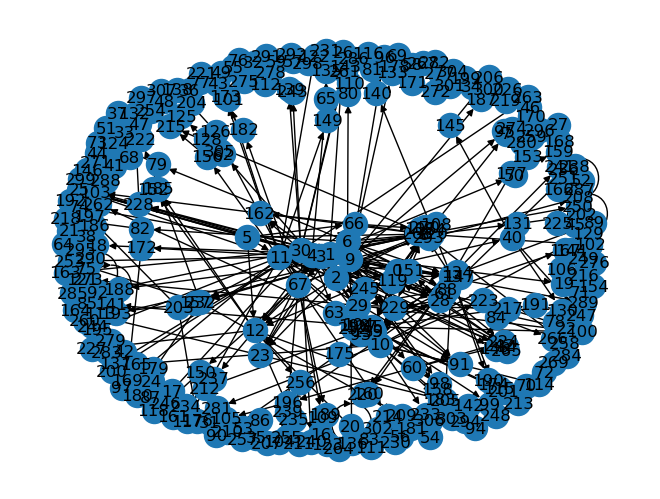

In [156]:
import matplotlib.pyplot as  plt 
nx.draw(nx_graph,with_labels=True)
plt.show()

In [ ]:
output

In [846]:
graph_data.x

tensor([[-0.3847, -1.0787,  2.2333,  ...,  0.8000,  0.8000,  0.8000],
        [-1.1451, -0.0088,  1.3490,  ...,  0.8000,  0.8000,  0.8000],
        [-1.3320, -0.4362,  1.3037,  ...,  0.8000,  0.8000,  0.8000],
        ...,
        [ 0.3941, -0.4527,  1.7086,  ...,  0.2000,  0.2000,  0.2000],
        [-0.2004, -2.4336,  0.6955,  ...,  0.2000,  0.2000,  0.2000],
        [-1.2168, -0.6643,  1.7927,  ...,  0.2000,  0.2000,  0.2000]])

# Link predicition 
 

In [893]:
from sklearn.metrics import roc_auc_score
from torch_geometric.utils import negative_sampling
from torch_geometric.utils import negative_sampling, train_test_split_edges


class Net(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super().__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, out_channels)
        self.conv3 = GCNConv(hidden_channels, out_channels)

    def encode(self, x, edge_index):
        x = self.conv1(x, edge_index).relu()
        return self.conv2(x, edge_index)

    def decode(self, z, edge_label_index):
        return (z[edge_label_index[0]] * z[edge_label_index[1]]).sum(
            dim=-1
        )  # product of a pair of nodes on each edge

    def decode_all(self, z):
        prob_adj = z @ z.t()
        return (prob_adj > 0).nonzero(as_tuple=False).t()
    

def train_link_predictor(
    model, train_data, val_data, optimizer, criterion, n_epochs=800
):

    for epoch in range(1, n_epochs + 1):

        model.train()
        optimizer.zero_grad()
        z = model.encode(train_data.x, train_data.edge_index)

        # sampling training negatives for every training epoch
        neg_edge_index = negative_sampling(
            edge_index=train_data.edge_index, num_nodes=train_data.num_nodes,
            num_neg_samples=train_data.edge_label_index.size(1), method='sparse')

        edge_label_index = torch.cat(
            [train_data.edge_label_index, neg_edge_index],
            dim=-1,
        )
        edge_label = torch.cat([
            train_data.edge_label,
            train_data.edge_label.new_zeros(neg_edge_index.size(1))
        ], dim=0)

        out = model.decode(z, edge_label_index).view(-1)
        loss = criterion(out, edge_label)
        loss.backward()
        optimizer.step()

        val_auc = eval_link_predictor(model, val_data)

        if epoch % 10 == 0:
            print(f"Epoch: {epoch:03d}, Train Loss: {loss:.3f}, Val AUC: {val_auc:.3f}")

    return model


@torch.no_grad()
def eval_link_predictor(model, data):

    model.eval()
    z = model.encode(data.x, data.edge_index)
    out = model.decode(z, data.edge_label_index).view(-1).sigmoid()

    return roc_auc_score(data.edge_label.cpu().numpy(), out.cpu().numpy())

In [894]:
import torch_geometric.transforms as T

split = T.RandomLinkSplit(
    num_val=0.05,
    num_test=0.1,
    is_undirected=True,
    add_negative_train_samples=False,
    neg_sampling_ratio=1.0,
)
train_data, val_data, test_data = split(graph_data)

In [895]:
print('training_data',train_data)
print('val_data',val_data)
print('test_data',test_data)

training_data Data(x=[308, 300], edge_index=[2, 574], edge_attr=[574, 10], edge_label=[287], edge_label_index=[2, 287])
val_data Data(x=[308, 300], edge_index=[2, 574], edge_attr=[574, 10], edge_label=[32], edge_label_index=[2, 32])
test_data Data(x=[308, 300], edge_index=[2, 606], edge_attr=[606, 10], edge_label=[66], edge_label_index=[2, 66])


In [896]:
model = Net(train_data.x.shape[1], 86, 32).to(device)
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)
criterion = torch.nn.BCEWithLogitsLoss()
model = train_link_predictor(model, train_data, val_data, optimizer, criterion)

test_auc = eval_link_predictor(model, test_data)
print(f"Test: {test_auc:.3f}")

Epoch: 010, Train Loss: 2.191, Val AUC: 0.807
Epoch: 020, Train Loss: 1.208, Val AUC: 0.910
Epoch: 030, Train Loss: 0.848, Val AUC: 0.910
Epoch: 040, Train Loss: 0.680, Val AUC: 0.898
Epoch: 050, Train Loss: 0.672, Val AUC: 0.883
Epoch: 060, Train Loss: 0.609, Val AUC: 0.914
Epoch: 070, Train Loss: 0.534, Val AUC: 0.922
Epoch: 080, Train Loss: 0.593, Val AUC: 0.930
Epoch: 090, Train Loss: 0.505, Val AUC: 0.945
Epoch: 100, Train Loss: 0.522, Val AUC: 0.926
Epoch: 110, Train Loss: 0.568, Val AUC: 0.926
Epoch: 120, Train Loss: 0.517, Val AUC: 0.926
Epoch: 130, Train Loss: 0.493, Val AUC: 0.926
Epoch: 140, Train Loss: 0.515, Val AUC: 0.898
Epoch: 150, Train Loss: 0.494, Val AUC: 0.887
Epoch: 160, Train Loss: 0.473, Val AUC: 0.875
Epoch: 170, Train Loss: 0.458, Val AUC: 0.895
Epoch: 180, Train Loss: 0.497, Val AUC: 0.867
Epoch: 190, Train Loss: 0.458, Val AUC: 0.859
Epoch: 200, Train Loss: 0.487, Val AUC: 0.863
Epoch: 210, Train Loss: 0.475, Val AUC: 0.863
Epoch: 220, Train Loss: 0.442, Val

## Node Classification 1
#### using Baseline Model (MLP) on Node Classification

In [883]:
import torch_geometric.transforms as T

split = T.RandomNodeSplit(num_val=0.1, num_test=0.2)
graph = split(graph)

In [884]:
import torch.nn as nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(dataset.num_node_features, 64),
        nn.ReLU(),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, dataset.num_classes)
        )

    def forward(self, data):
        x = data.x  # only using node features (x)
        output = self.layers(x)
        return output

In [885]:
def train_node_classifier(model, graph, optimizer, criterion, n_epochs=200):

    for epoch in range(1, n_epochs + 1):
        model.train()
        optimizer.zero_grad()
        out = model(graph)
        loss = criterion(out[graph.train_mask], graph.y[graph.train_mask])
        loss.backward()
        optimizer.step()

        pred = out.argmax(dim=1)
        acc = eval_node_classifier(model, graph, graph.val_mask)

        if epoch % 10 == 0:
            print(f'Epoch: {epoch:03d}, Train Loss: {loss:.3f}, Val Acc: {acc:.3f}')

    return model


def eval_node_classifier(model, graph, mask):

    model.eval()
    pred = model(graph).argmax(dim=1)
    correct = (pred[mask] == graph.y[mask]).sum()
    acc = int(correct) / int(mask.sum())

    return acc
  
  
mlp = MLP().to(device)
optimizer_mlp = torch.optim.Adam(mlp.parameters(), lr=0.01, weight_decay=5e-4)
criterion = nn.CrossEntropyLoss()
mlp = train_node_classifier(mlp, graph, optimizer_mlp, criterion, n_epochs=150)

test_acc = eval_node_classifier(mlp, graph, graph.test_mask)
print(f'Test Acc: {test_acc:.3f}')

Epoch: 010, Train Loss: 0.843, Val Acc: 0.745
Epoch: 020, Train Loss: 0.077, Val Acc: 0.775
Epoch: 030, Train Loss: 0.017, Val Acc: 0.768
Epoch: 040, Train Loss: 0.012, Val Acc: 0.760
Epoch: 050, Train Loss: 0.014, Val Acc: 0.771
Epoch: 060, Train Loss: 0.012, Val Acc: 0.768
Epoch: 070, Train Loss: 0.009, Val Acc: 0.764
Epoch: 080, Train Loss: 0.008, Val Acc: 0.753
Epoch: 090, Train Loss: 0.007, Val Acc: 0.753
Epoch: 100, Train Loss: 0.007, Val Acc: 0.760
Epoch: 110, Train Loss: 0.006, Val Acc: 0.760
Epoch: 120, Train Loss: 0.006, Val Acc: 0.756
Epoch: 130, Train Loss: 0.006, Val Acc: 0.756
Epoch: 140, Train Loss: 0.006, Val Acc: 0.756
Epoch: 150, Train Loss: 0.006, Val Acc: 0.749
Test Acc: 0.725


## Node Classification 2
#### using GCN on Node Classification

In [886]:
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        output = self.conv2(x, edge_index)

        return output
    
    
gcn = GCN().to(device)
optimizer_gcn = torch.optim.Adam(gcn.parameters(), lr=0.01, weight_decay=5e-4)
criterion = nn.CrossEntropyLoss()
gcn = train_node_classifier(gcn, graph, optimizer_gcn, criterion)

test_acc = eval_node_classifier(gcn, graph, graph.test_mask)
print(f'Test Acc: {test_acc:.3f}')

Epoch: 010, Train Loss: 0.990, Val Acc: 0.830
Epoch: 020, Train Loss: 0.426, Val Acc: 0.908
Epoch: 030, Train Loss: 0.251, Val Acc: 0.900
Epoch: 040, Train Loss: 0.186, Val Acc: 0.893
Epoch: 050, Train Loss: 0.155, Val Acc: 0.893
Epoch: 060, Train Loss: 0.139, Val Acc: 0.897
Epoch: 070, Train Loss: 0.130, Val Acc: 0.897
Epoch: 080, Train Loss: 0.122, Val Acc: 0.897
Epoch: 090, Train Loss: 0.114, Val Acc: 0.897
Epoch: 100, Train Loss: 0.108, Val Acc: 0.900
Epoch: 110, Train Loss: 0.102, Val Acc: 0.900
Epoch: 120, Train Loss: 0.097, Val Acc: 0.904
Epoch: 130, Train Loss: 0.093, Val Acc: 0.904
Epoch: 140, Train Loss: 0.090, Val Acc: 0.904
Epoch: 150, Train Loss: 0.086, Val Acc: 0.904
Epoch: 160, Train Loss: 0.084, Val Acc: 0.904
Epoch: 170, Train Loss: 0.081, Val Acc: 0.904
Epoch: 180, Train Loss: 0.079, Val Acc: 0.904
Epoch: 190, Train Loss: 0.077, Val Acc: 0.904
Epoch: 200, Train Loss: 0.075, Val Acc: 0.904
Test Acc: 0.865
